#MSc in Computing (Negotiated Learning) 
#Practicum Team Software Project Option
#Introduction To Text Analytics Using Python & NLTK

#Using iPython Notebook

The IPython Notebook is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media (http://ipython.org/notebook.html). An iPython notebook is brillient for exploratory development of the kind you are likely to do a ,lot of in this project. It is **NOT** good, however, for a deployable system so you should plan to migrate your code for deployment.

The easiest way to install iPython notebooks is using Anaconda, downloadable from http://ipython.org/install.html.

Often we will need to add extra packages to the iPython distribution. We can do this using the conda command line tool. This is avialble from the folder in which you installed anaconda (likely C:\anaconda). Use the following line to install the package **matplotlib**:

**conda install matplotlib**

##An Introduction To NLTK

The **Natural Language Toolkit**, **NLTK** (http://www.nltk.org/), is a well written, widely used, and well respected toolkit for perofmring natural langueg processing in Python. It offers a wide range of useful functionality and data structres that make text natural langueg processing, and so text analytics, much easier. Features included in the NLTK include corpus management, document classification, colocation discoverym, part of speech tagging, parsing, and chunking. The best reference for the NLTK is the **NLTK Book**, Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit by Steven Bird, Ewan Klein, and Edward Loper, which is freely avialble online at http://www.nltk.org/book/ or for sale at http://www.amazon.co.uk/Natural-Language-Processing-Python-Steven/dp/0596516495. Many of the examples in this tutorial are taken from this book.

##Import Packages

Import a set of packages that we will use in order to perform text analysis. These are very commonly used Python packages.

In [1]:
import nltk # The best known Python natural language processing toolkit
from nltk import FreqDist # Explicitlty import the FreqDist function from NLTK
import numpy # Package for scientific computing
import matplotlib # Python plotting library
import matplotlib.pyplot as plt # Easy syntax access to pyplot
import re # functions fior dealing with regular expressions
import feedparser # For reading RSS feeds - imstnall using ./conda install feedparser
import urllib2 # for accessing URLs
from bs4 import BeautifulSoup # For parsing HTML documents

# Tells iPython notebook to draw graphic sinline in the webpage
%matplotlib inline 

# Ensure that we import later version of division so that we default to floating point division.
from __future__ import division

Occasionally we need to install bits and pieces (e.g. corpora) from the NLTK. To do this uncommment and run the code below which will launch the interactive NLTK downloader. 

In [ ]:
# Uncomment this in order to launch the NLTK downloader to access corpora, packages etc
nltk.download()

##Load An NLTK Built-In Corpus

In [3]:
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

#Find Text Within a Corpus

A concordance returns a set of sentences that include a search term or terms. We first create an NLTK text object that we can manipulate.

In [4]:
hamlet = nltk.Text(nltk.corpus.gutenberg.words('shakespeare-hamlet.txt'))

Using the NLTK **concordance** function we can generate a set of setences containing a chose word.

In [5]:
hamlet.concordance("prince")

Displaying 3 of 3 matches:
hus I did bespeake Lord Hamlet is a Prince out of thy Starre , This must not b
cke a Noble heart : Goodnight sweet Prince , And flights of Angels sing thee t
 . FINIS . The tragedie of HAMLET , Prince of Denmarke .


We can generate a text object containing all of the texts in our corpus and generate a concordance from this.

In [ ]:
allText = nltk.Text(nltk.corpus.gutenberg.words())
allText.concordance('sandwich')

**EXERCISE:** Genrate a concordance of the occurences of the word *whale* in *Moby Dick* and the word *computer* in the overall gutenburg corpus. 

A **dispersion plot** is a fun data visualsiation supported by NLTK that shows us where in a text words appear. It is generated using the **dispersion_plot** function.

In [ ]:
hamlet.dispersion_plot(["Hamlet", "Horatio", "Ophelia", "Fortinbras", "Yorick"])

A more powerful way that we can find text within a corpus is to use **regular expressions**. Regular expressions are a powerful way to define textual patterns that allow us find interesting things within a document. First just find all words engin in "ings".

In [58]:
list(set([w for w in hamlet if re.search('ings$', w)]))

['strings',
 'Sings',
 'Mornings',
 'nothings',
 'commings',
 'Vndertakings',
 'things',
 'droppings',
 'pratlings',
 'wings',
 'concernings',
 'Groundlings',
 'sings',
 'Greetings',
 'Things',
 'stockings',
 'Kings',
 'Slings',
 'Trappings',
 'springs']

This is some nice Python code to iterate through all the words in our hamlet list, and to add those that match our regular expression to a new list. Python is great for this type of stuff!

In the next example we consider a Hamlet-based crossword puzzle in which we we need to find a word that matches this pattern: _ _ m _ _ t 

In [59]:
 list(set([w for w in hamlet if re.search('^..m..t$', w)]))

['lament',
 'Almost',
 'Hamlet',
 'almost',
 'moment',
 'Somnet',
 'Vnmixt',
 'inmost',
 'sement']

There is tonnes that you can do with regular expressions - find dates, find phone numbers, find matches for types of words, find pattrerns across multiple words .... The basic operators for definining regular expressions are as follows.

Operator | Behavior
----------|------------
. |	Wildcard, matches any character
^abc |	Matches some pattern abc at the start of a string
abc\$ |	Matches some pattern abc at the end of a string
[abc] |	Matches one of a set of characters
[A-Z0-9] |	Matches one of a range of characters
ed $\mid$ ing $\mid$ s |	Matches one of the specified strings (disjunction)
* |	Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+ |	One or more of previous item, e.g. a+, [a-z]+
? |	Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n} |	Exactly n repeats where n is a non-negative integer
{n,} |	At least n repeats
{,n} |	No more than n repeats
{m,n} |	At least m and no more than n repeats
a(b $\mid$ c)+ |	Parentheses that indicate the scope of the operators

**EXERCISE:** Load the corpus of American presedential inaugural addresses, nltk.corpus.inaugural, and find all mentions of *America*, *freedom*, and *war*.

##Counting Vocabulary

Counting vocabulary is a really important thing to do in text, and we can do it easily in Python with NLTK. First, let's get the number of words in Hamlet.

In [60]:
len(hamlet)

37360

Let's extract the number of unique words - converting from a Python **list** to a Python **set** does this!

In [61]:
len(set(hamlet))

5447

**Lexical diversity** is a technique used to measure how complicated a text is. It is just the ratio of unique words to total words. Higher values indicate more complicated texts.

In [62]:
len(set(hamlet))/len(hamlet)

0.14579764453961455

**EXERCISE:** Calculate the lexical diversity of *Moby Dick* and *Alice In Wonderland*.

We can easily define a lexical diversity function

In [63]:
# Define function to calcualte lexical diversity
def lexical_diversity(text):
    return len(set(text)) / len(text)

# Use the newly defined function to claculate the lexical diversity of hamlet
lexical_diversity(hamlet)

0.14579764453961455

Counting the **most frequently occuring words** in a text is one of the most common ways to analyse the meansing of a text. The NLTK makes this job very easy for us by allowing us to quickly generate a **frequency distribution** using the **FreqDist** function.

Lexical diversity: 0.283389830508
<FreqDist: 'ham': 337, 'd': 223, 'lord': 211, 'haue': 178, 'king': 172, 'shall': 107, 'thou': 107, 'come': 104, 'let': 104, 'hamlet': 100, ...>
100
Frequency Hamlet: 100
ham: 337
d: 223
lord: 211
haue: 178
king: 172
shall: 107
thou: 107
come: 104
let: 104
hamlet: 100
good: 98
hor: 95
thy: 90
enter: 85
oh: 81
like: 80
would: 73
know: 71
well: 71
tis: 69
selfe: 68


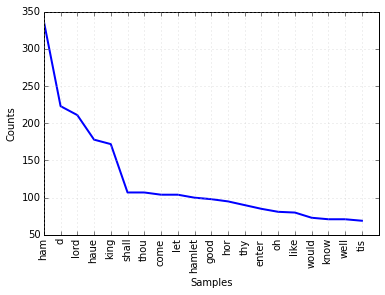

In [64]:
# convert all words to lower case
hamlet = [w.lower() for w in hamlet]

# Remove all punctuation from word lists - note the use of regular expressions!
hamlet = [w for w in hamlet if not (re.match(r'^\W+$', w) != None)]

# Remove all stop words from word lists
hamlet = [w for w in hamlet if not w in nltk.corpus.stopwords.words('english')]

#print hamlet

# Print revised lexical diversity
print '{}{}'.format('Lexical diversity: ', lexical_diversity(hamlet))

# Generate the frquency distribution for hamlet
hamlet_freq_dist = FreqDist(hamlet)
print hamlet_freq_dist

# Print the number of occurences of the word hamlet
print hamlet_freq_dist['hamlet']
print '{}{}'.format('Frequency Hamlet: ', hamlet_freq_dist['hamlet'])

# Print the top X words
numWords = 0
wordLimit = 20
for w in hamlet_freq_dist.keys():
    print '{}{}{}'.format(w, ': ', hamlet_freq_dist[w])
    numWords = numWords + 1
    if numWords > wordLimit:
        break

# Plot a nice graph of word frequencies
hamlet_freq_dist.plot(wordLimit)

We can also plot a word cloud from this frequency distribution (watch out for the path to the font used).

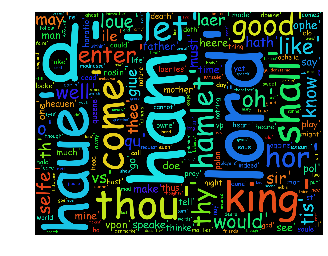

In [65]:
wordcloud = WordCloud(font_path='/Library/Fonts/Comic Sans MS.ttf',
                     stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(str(hamlet))


plt.imshow(wordcloud)
plt.axis('off')
#matplotlib.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()

Nice webpage explaining how to make word clouds from your Twitter feed: http://spartanideas.msu.edu/2014/11/28/turn-your-twitter-timeline-into-a-word-cloud-using-python/#A.-Downloading-Your-Twitter-Timeline-Tweets

##Accessing Data From Other Places

Accessing data from a text file is straightforward. 

In [66]:
# Load a simple text file into a string variable
with open ("test_text.txt", "r") as myfile:
    text=myfile.read()

# Print the loaded text
print text
print 

# Perform a sentence tokenisarion
sentences = nltk.sent_tokenize(text)

# Print the list of setnences
print sentences
print 

# Iterate through the setnences and print each one
for s in sentences:
    print s
    print
    
# Extra one setnence and tokenize it into words
second_sentence = sentences[2]
words = nltk.word_tokenize(second_sentence)

# Print the list of words
print words
print

# Iterate through the words and print each one
for w in words:
    print w
    print

This is a simple text file that we will use to demonstrate file hadnling in Python. We will also use it to show off how the NLTK tonkenisers can be used. We'll see that tekenisers are very useful. This is one last sentence for extra interest!! This was written by Dr. Brian Mac Namee.

['This is a simple text file that we will use to demonstrate file hadnling in Python.', 'We will also use it to show off how the NLTK tonkenisers can be used.', "We'll see that tekenisers are very useful.", 'This is one last sentence for extra interest!!', 'This was written by Dr. Brian Mac Namee.']

This is a simple text file that we will use to demonstrate file hadnling in Python.

We will also use it to show off how the NLTK tonkenisers can be used.

We'll see that tekenisers are very useful.

This is one last sentence for extra interest!!

This was written by Dr. Brian Mac Namee.

['We', "'ll", 'see', 'that', 'tekenisers', 'are', 'very', 'useful', '.']

We

'll

see

that

tekenisers

are

very

usefu

Accessing data from web pages is straightforward. The tricky bit is extracting the useful information from the webpage. We can use the Python **urllib12** and **BeautifulSoup4** packages to make this easier.

In [ ]:
# Read the HTML file
url = "http://www.irishtimes.com/culture/music/2.2117/slane-back-with-a-bang-as-foo-fighters-wow-60-000-1.2232432"
response = urllib2.urlopen(url)
html = response.read()

# Create a beautiful soup object from the text file so that we get at the article text
article_soup = BeautifulSoup(html)

# Extract the actual article text  - this relies on the fact that I know what the HTML looks like, not completely robust!
article_text = article_soup.find('section', property='articleBody').get_text()

print article_text

# Create a word cloud
wordcloud = WordCloud(font_path='/Library/Fonts/Comic Sans MS.ttf',
                     stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(article_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# tokenise the article text
tokens = nltk.word_tokenize(article_text)

# Create an NLTK object 
article_nltk_text = nltk.Text(tokens)

# convert all words to lower case
article_nltk_text = [w.lower() for w in article_nltk_text]

# Remove all punctuation from word lists - note the use of regular expressions!
article_nltk_text = [w for w in article_nltk_text if not (re.match(r'^\W+$', w) != None)]

# Remove all stop words from word lists
article_nltk_text = [w for w in article_nltk_text if not w in nltk.corpus.stopwords.words('english')]

# Generate the frquency distribution
article_freq_dist = FreqDist(article_nltk_text)
print article_freq_dist


One way to access lots of news articles is to use an RSS feed. We can access RSS feeds easily in Python using the **feedparser** package.

In [68]:
# Read from the Irish Times RSS feed
RSS_url = "https://www.irishtimes.com/cmlink/news-1.1319192"
it_feed = feedparser.parse(RSS_url)
len(it_feed.entries)

# Iterate through the entries from the feed and print the title of each article and the URL for the articl
for article_entry in it_feed.entries:
    article_title = article_entry['title']
    article_url = article_entry['links'][0]['href']
    print article_title
    print article_url

May  was cold and wet  - but a change is on its way
http://www.irishtimes.com/news/environment/may-was-cold-and-wet-but-a-change-is-on-its-way-1.2233677
Experts hail a ‘new era’ for cancer treatments
http://www.irishtimes.com/news/health/experts-hail-a-new-era-for-cancer-treatments-1.2233470
The shoot-out: iPhone 5S versus Canon 700D10
http://www.irishtimes.com/news/technology/the-shoot-out-iphone-5s-versus-canon-700d10-1.2233429
Northern Ireland sex trade moving over the Border
http://www.irishtimes.com/news/ireland/irish-news/northern-ireland-sex-trade-moving-over-the-border-1.2233424
British security service shielded abusers in Belfast care home, court hears
http://www.irishtimes.com/news/ireland/irish-news/british-security-service-shielded-abusers-in-belfast-care-home-court-hears-1.2233391
Kenny criticised over failure to hand over Kingsmill files
http://www.irishtimes.com/news/crime-and-law/kenny-criticised-over-failure-to-hand-over-kingsmill-files-1.2233365
Teenager who died duri

Twitter is obviously a fun service to get text from. We can use the **Tweepy** package to access the Twitter API. Before using Tweepy you must have Twitter **OAuth credentials** available from https://apps.twitter.com/. Create a new applciation (using your own Twitter credentials) and the generate access tokens.

In [69]:
import tweepy

# OAuth access details for getting at the Twitter API - having these in my code is pretty insecure!!
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

coord_list = list()
public_tweets = api.home_timeline(count=25)
for tweet in public_tweets:
    print tweet.author.name
    print tweet.text
    coord_list.append(tweet.coordinates)
    print 
    

Ingo Keck
RT @okfn_spain: No te vayas a perder la @HacksHackersBCN de las #JPD15 de BCN Casos locales d #periodismodatos @CCCBLab @Carlapedret http:/…

Robert Llewellyn
Me to the weather in the UK.
"Are you serious! This damn cold on June 1st!"
Just lit a fire in the wood burner.
Doh!

Ingo Keck
RT @Alxtowrs: A new @UN report recognizes the importance of encryption in guaranteeing human rights like freedom of expression: https://t.c…

The Anti Media
#NSA Stops #Spying and World Doesn’t End! But #CivilLiberties Still in #Congress’ Cross Hairs http://t.co/RnhwMLmcdp http://t.co/xtRHLSk7HQ

Gregory Piatetsky
Sumo Logic raises $80M to analyse companies IT #BigData from servers, devices #IoT #BigDataCo http://t.co/nBnCNgfF5A

Ingo Keck
RT @okfn_spain: A las 10 de la mañana comienzan en @medialabprado las #JPD15 con #opendata de @finodexproject http://t.co/r0f72k3nKU @jsman…

Revolution Analytics
.@RevolutionR #RRE 7.4 now available http://t.co/1QHluWEWWS

MargaretScott
RT @MPollockTrust: Co

##Classifying Text

Let's do some very simple **sentiment analysis** with Python. We'll download a positive word list and a negative word list and rate the sentiment of documents by the amount of positive or negative content that they contain. This code is inspired by http://nealcaren.web.unc.edu/an-introduction-to-text-analysis-with-python-part-3/

In [70]:
# Read the HTML file
url_pos = 'http://www.unc.edu/~ncaren/haphazard/positive.txt'
response = urllib2.urlopen(url_pos)
pos_text = response.read(response)

url_neg = 'http://www.unc.edu/~ncaren/haphazard/negative.txt'
response = urllib2.urlopen(url_neg)
neg_text = response.read(response)

pos_list = pos_text.split()
neg_list = neg_text.split()

#sentence = "Dwayne Johnson continues to be one of our most dependable action stars, but critics say his affable presence -- and some eye-popping special effects -- only partially compensate for San Andreas' cardboard characters and risible dialogue. Ray Gaines (Johnson) is a Los Angeles Fire Department helicopter pilot who teams with his estranged wife Emma (Carla Gugino) to rescue their daughter after a massive earthquake ravages the Golden State. The pundits say San Andreas is an uneasy (and often preposterous) mix of family drama and disaster spectacle, but it works reasonably well as large-scale popcorn entertainment."
#sentence = "Director George Miller made his name with the original Mad Max trilogy, and spent years trying to get a new installment off the ground. Well, the wait is over, and it was certainly worth it: critics say Mad Max: Fury Road is one of the best action movies of recent memory, a blast of exhilarating thrills and spectacular imagery that's both pulse-poundingly visceral and stealthily cerebral. After defecting from a massive fortress called the Citadel with a group of concubines in tow, Imperator Furiosa (Charlize Theron) eventually joins forces with expert driver Mad Max Rockatansky (Tom Hardy). They're pursued by a fleet of heavily armed vehicles, and a symphony of automotive mayhem ensues. The pundits say the Certified Fresh Mad Max: Fury Road is a glorious exercise in pop filmmaking -- it's uncompromisingly bold, breathlessly paced, and a lot of fun."
sentence = "Banking on the success of the Pirates of the Caribbean franchise, Disney poaches another of its theme park attractions for this sci-fi adventure. A plucky teenager (Britt Robertson) discovers an interdimensional utopia while helping a cranky scientist (George Clooney) and robot child (Raffey Cassidy) prevent Earth's self-imposed apocalypse. Director Brad Bird brings his vivid widescreen compositions and kitschy retro-futurism to a screenplay he co-wrote with Damon Lindleof, but his storytelling, a strong point in The Iron Giant (1999) and The Incredibles (2004), is harsh and inelegant. An aggressively optimistic script admonishes the lazy and irresolute and urges humanity to end war and save the environment; the proselytizing burdens an already onerous plot. "
sentence_list = nltk.word_tokenize(sentence)

pos_overlap = len(set(sentence_list) & set(pos_list))
neg_overlap = len(set(sentence_list) & set(neg_list))

pos_score = pos_overlap/(pos_overlap + neg_overlap)
neg_score = neg_overlap/(pos_overlap + neg_overlap)

print pos_score
print neg_score

0.454545454545
0.545454545455


The other thing  that can be really useful it s to build a **text classifier** trainined on a specific corpus. Using a corpus of movie reviews we will build a document classifier that predicts how much people will like a movie. One simple way to represent documents for document classification is with a **bag of words** representation. 

![Alt text](./TextClassification/Slide034.jpg)
![Alt text](./TextClassification/Slide035.jpg)
![Alt text](./TextClassification/Slide036.jpg)
![Alt text](./TextClassification/Slide037.jpg)
![Alt text](./TextClassification/Slide038.jpg)
![Alt text](./TextClassification/Slide039.jpg)



One of the unique characteristics of textual data is the very large number of features involved – typically in the range of tens of thousands of features. It is common practice to reduce the number of features as much as possible before attempting to build a classifier.

Zipf’s Law captures the distribution of the frequency of occurrence of words in natural language texts 
Zipf’s law suggests two things:
* High frequency words occur in too many documents to be useful in prediction
* Low frequency words are too rare to be of value 

We utilise two common feature reduction techniques: 
* Stop-word removal to remove the high frequency words – achieved using a list of known stop words
* Document frequency to remove the low frequency words – remove terms that occur at most n times (1 <= n <= 3)
These will typically reduce a feature set massively

Example **stop words**: a
about
above
across
after
afterwards
again
against
all
almost
alone
along
already
also
although
always
am
among
amongst
amoungst
amount
an
and
another
any
anyhow
anyone
anything
anyway
anywhere
are
around
as
at
back
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
between
beyond
bill
both
bottom
but
by
call
can
cannot
cant
co
computer
con
could
couldnt
cry
de
describe
detail
do
done
down
due
during
each
eg
eight
either
eleven
else
elsewhere
empty
enough
etc
even
ever
every
everyone
everything
everywhere
except
few
fifteen
fify
fill
find
fire
first
five
for
former
formerly
forty
found
four
from
front
full
further
get
give
go
had
has
hasnt
have
he
hence
her
here
hereafter
hereby
herein
hereupon
hers
herself
him
himself
his
how
however
hundred
i
ie
if
in
inc
indeed
interest
into
is
it
its
itself
keep
last
latter
latterly
least
less
ltd
made
many
may
me
meanwhile
might
mill
mine
more
moreover
most
mostly
move
much
must
my
myself
name
namely
neither
never
nevertheless
next
nine
no
nobody
none
noone
nor
not
nothing
now
nowhere
of
off
often
on
once
one
only
onto
or
other
others
otherwise
our
ours
ourselves
out
over
own
part
per
perhaps
please
put
rather
re
same
see
seem
seemed
seeming
seems
serious
several
she
should
show
side
since
sincere
six
sixty
so
some
somehow
someone
something
sometime
sometimes
somewhere
still
such
system
take
ten
than
that
the
their
them
themselves
then
thence
there
thereafter
thereby
therefore
therein
thereupon
these
they
thick
thin
third
this
those
though
three
through
throughout
thru
thus
to
together
too
top
toward
towards
twelve
twenty
two
un
under
until
up
upon
us
very
via
was
we
well
were
what
whatever
when
whence
whenever
where
whereafter
whereas
whereby
wherein
whereupon
wherever
whether
which
while
whither
who
whoever
whole
whom
whose
why
will
with
within
without
would
yet
you
your
yours
yourself
yourselves

![Alt text](./TextClassification/Slide046.jpg)
![Alt text](./TextClassification/Slide047.jpg)

Once we have a bag of words represenation we can use a **Naive Bayes** classifier to learn to recognise the differences between categories of documents. The Naive Bayes formula is as follows:

$\mathbb{M}(\mathbf{q})= arg\, max_{l \in levels(t)} \left(\left(\displaystyle \prod_{i=1}^m P(\mathbf{q}\left[i\right]\mid t=l) \right) \times P(t=l)\right)$

where $\mathbf{q}$ is a query instance represented using a bag of words representation, $l$ is from a defined set of target levels, $P(\mathbf{q}\left[i\right]\mid t=l)$ is the probability of seeing the word $\mathbf{q}\left[i\right]$ in a document of type $l$, and $P(t=l)$ is the prior probability of seeing a document of class $l$.

In [71]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
    for category in movie_reviews.categories()
    for fileid in movie_reviews.fileids(category)]
#random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(5)


0.86
Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.4 : 1.0
        contains(seagal) = True              neg : pos    =      8.7 : 1.0
         contains(mulan) = True              pos : neg    =      8.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.3 : 1.0
         contains(damon) = True              pos : neg    =      5.7 : 1.0


##Other Things We Can Do With NLTK

The NLTK has lots of other great features. For example we can tag parts of speech in text.

In [72]:
sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
print tagged

[('At', 'IN'), ('eight', 'CD'), ("o'clock", 'JJ'), ('on', 'IN'), ('Thursday', 'NNP'), ('morning', 'NN'), ('Arthur', 'NNP'), ('did', 'VBD'), ("n't", 'RB'), ('feel', 'VB'), ('very', 'RB'), ('good', 'JJ'), ('.', '.')]


Identify **named entities** within a text.

In [73]:
entities = nltk.chunk.ne_chunk(tagged)
print entities

(S
  At/IN
  eight/CD
  o'clock/JJ
  on/IN
  Thursday/NNP
  morning/NN
  (PERSON Arthur/NNP)
  did/VBD
  n't/RB
  feel/VB
  very/RB
  good/JJ
  ./.)
